# **Machine Learning Project**

## ***Predicting Rossman Store's Sales***


#### Group 9: Anh Doan, Anh Dinh, Duy Le, Thao Chu ####






### **Introduction** 
In this project, we will compare 2 machine learning models, namely **Linear Regression** and **XGBoost** , and also explain the use for each algorithm. The dataset used for this project is
called **Rossman store sales**

First of all, we will import some basic libraries that is used for processing data and visualization

In [ ]:
import numpy as np                  #For linear algebra
import pandas as pd                 #For working with dataset
import matplotlib                 
import matplotlib.pyplot as plt     #Visualisation
import seaborn as sns               #Visualisation

## **I. Data exploration**

##### In this project, we'll apply gradient boosting (XGBoost) and linear regression to a real-world dataset from the Rossmann Store Sales competition on Kaggle:

>The task at hand involves developing a machine learning model for sales forecasting at Rossmann, which operates over 3,000 drug stores across seven European countries. The aim is to predict daily sales up to six weeks in advance, taking into consideration various factors that influence store sales, such as promotions, competition, holidays, seasonality, and location.

> To achieve this, historical sales data for 1,115 Rossmann stores has been provided, with the objective of forecasting the "Sales" column for the test set. However, some stores in the dataset were temporarily closed for refurbishment. The goal is to build a predictive model that can generalize to new data and accurately forecast sales for Rossmann stores, accounting for differences in various countries and situations.


In [ ]:
ross_df = pd.read_csv('train.csv', low_memory=False)
store_df = pd.read_csv('store.csv')



In [ ]:
ross_df


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Merge data ###

First, we will merge store_df with ross_df to have more information for creating the models

In [ ]:
#Now let's merge the information from store_df into train_df and test_df with store_df
merged_df = ross_df.merge(store_df, how='left', on='Store')


Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83893,269,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,c,60.0,6.0,2015.0,0,NaN,NaN,NaN
83894,270,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,1450.0,7.0,2014.0,0,NaN,NaN,NaN
83895,271,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,420.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
83896,272,7.0,2015-05-17,0.0,0.0,0.0,0.0,0,0.0,a,a,16180.0,7.0,2003.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

> We can see that our dataset includes both **numerical** and **categorical** variables. And there are also **missing values** in our dataset since the number of **non-null** values doesn't match the number of entries.

We create 2 variable called **`categorical`** and **`numerical`** to make it easier for inspecting the columns given their different characteristics.

In [ ]:
# List of categorical variables
categorical = [i for i in merged_df.columns if merged_df[i].dtypes == 'O']
# List of numerical variables
numerical = [i for i in merged_df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'] 
 numerical:  ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']




```
# This is formatted as code
```

Let's check how many null values are there in each variable

We calculate and plot the number of missing values in numerical variables

In [ ]:
merged_df[numerical].isnull().sum()

Store                            0
DayOfWeek                        1
Sales                            1
Customers                        1
Open                             1
Promo                            1
SchoolHoliday                    1
CompetitionDistance            225
CompetitionOpenSinceMonth    26637
CompetitionOpenSinceYear     26637
Promo2                           0
Promo2SinceWeek              40935
Promo2SinceYear              40935
dtype: int64

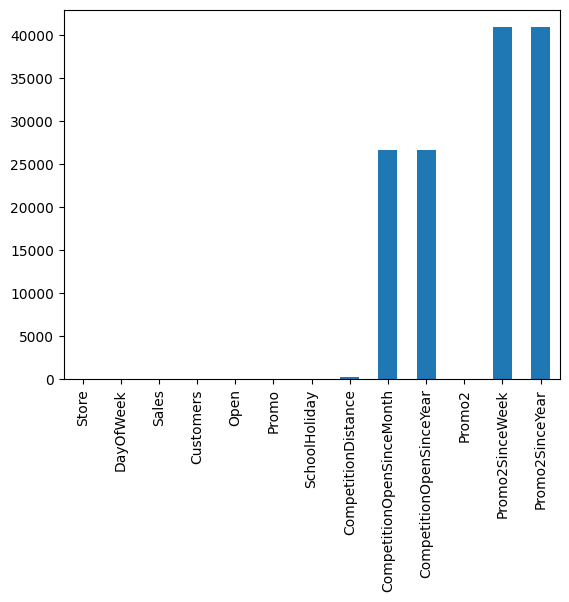

In [ ]:
merged_df[numerical].isnull().sum().plot.bar()
plt.show()

> As can be seen, **`Promo2SinceWeek`**, **`Promo2SinceYear`**, **`CompetitionOpenSinceMonth`** and **`CompetitionOpenSinceYear`** are the ones with the highest number of missing values in numerical segment.

In [ ]:
round(merged_df[numerical].isnull().sum() / 1017209, 3)

Store                        0.000
DayOfWeek                    0.000
Sales                        0.000
Customers                    0.000
Open                         0.000
Promo                        0.000
SchoolHoliday                0.000
CompetitionDistance          0.000
CompetitionOpenSinceMonth    0.026
CompetitionOpenSinceYear     0.026
Promo2                       0.000
Promo2SinceWeek              0.040
Promo2SinceYear              0.040
dtype: float64

>Approximately **50%** values of each Promo2SinceWeek, Promo2SinceYear is missing, while the rate for CompetitionOpenSinceMonth and CompetitionOpenSinceYear is at around **32%**. 

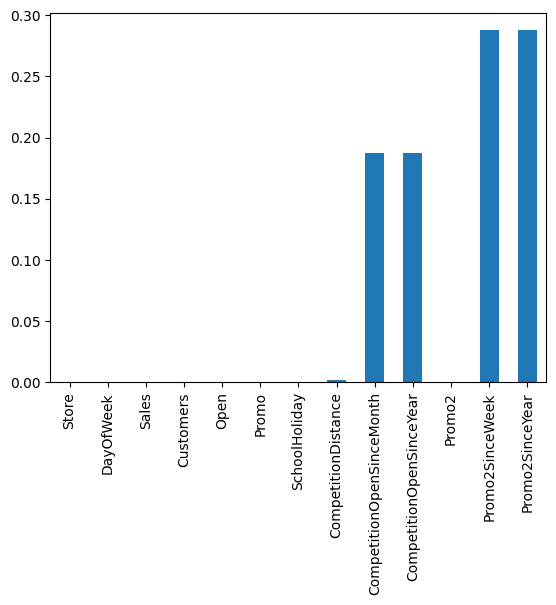

In [ ]:
(merged_df[numerical].isnull().sum() / 142193).plot.bar()
plt.show()

Similarly, we calculate and plot the number of missing values in categorical variables

In [ ]:
merged_df[categorical].isnull().sum()

Date                  0
StateHoliday          0
StoreType             0
Assortment            0
PromoInterval    508031
dtype: int64

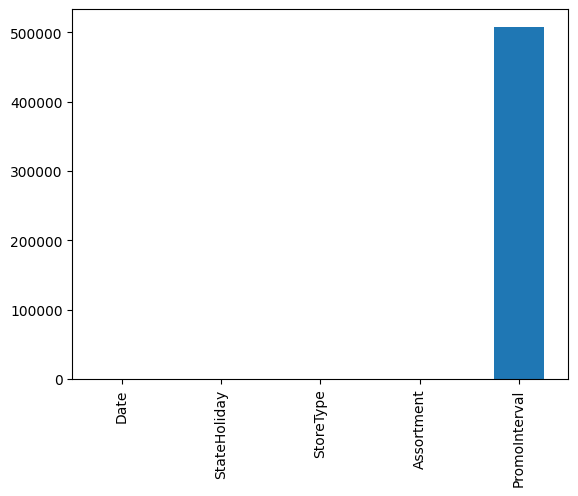

In [ ]:
merged_df[categorical].isnull().sum().plot.bar()
plt.show()

In [ ]:
round(merged_df[categorical].isnull().sum() / 1017209, 3)

Date             0.000
StateHoliday     0.000
StoreType        0.000
Assortment       0.000
PromoInterval    0.499
dtype: float64

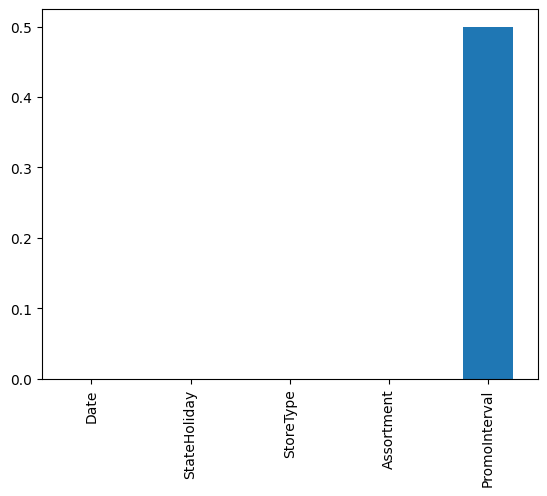

In [ ]:
(merged_df[categorical].isnull().sum() / 1017209).plot.bar()
plt.show()

> The missing rate in categorical variable is not much since the highest one is around ***50%*** of **`Promolnterval`**. On the other hand, the others show no sign of missing values.




Let's inspect the **distribution** of **numerical variables**.

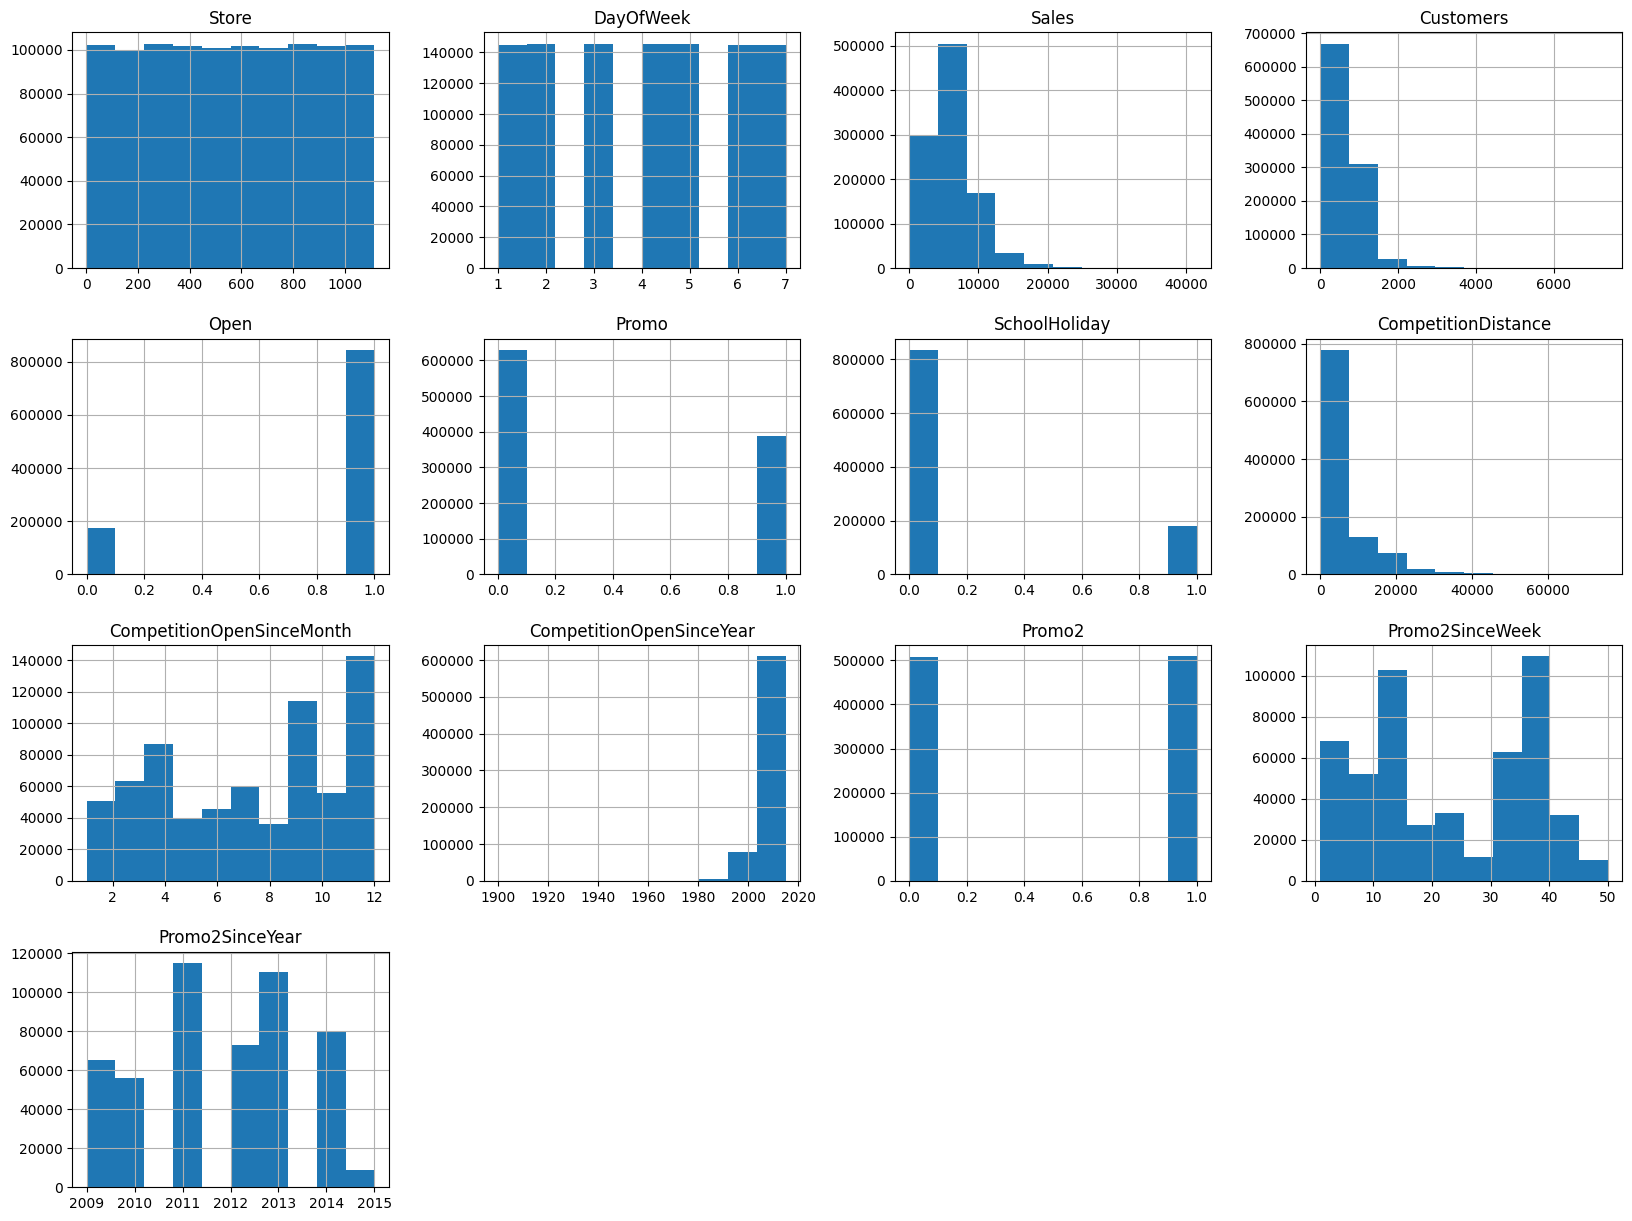

In [ ]:
merged_df[numerical].hist(bins=10, figsize = (20,15))
plt.show()

> The histograms show us that some variables follow uniform distribution and binominal, for example **`Store`**, **`Promo`**, **`SchoolHoliday`** while some are highly skewed, namely **`Sales`**, **`Customers`**. We will process these values later before using them for the model.



Some descriptive statistics about categorical variables

In [ ]:
merged_df[categorical].describe()

,Date,StateHoliday,StoreType,Assortment,PromoInterval
count,1017209,1017209,1017209,1017209,509178
unique,942,4,4,3,3
top,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
freq,1115,986159,551627,537445,293122


> From the summary table, we can see the most frequent values of each variable and its frequency in the dataset. 

Let's have a look at some statistics of the dataset

In [ ]:
merged_df[numerical].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


> The table shows that variables are of **different ranges**

Let's draw boxplots to inspect the **range** of the data and **anomalies**.

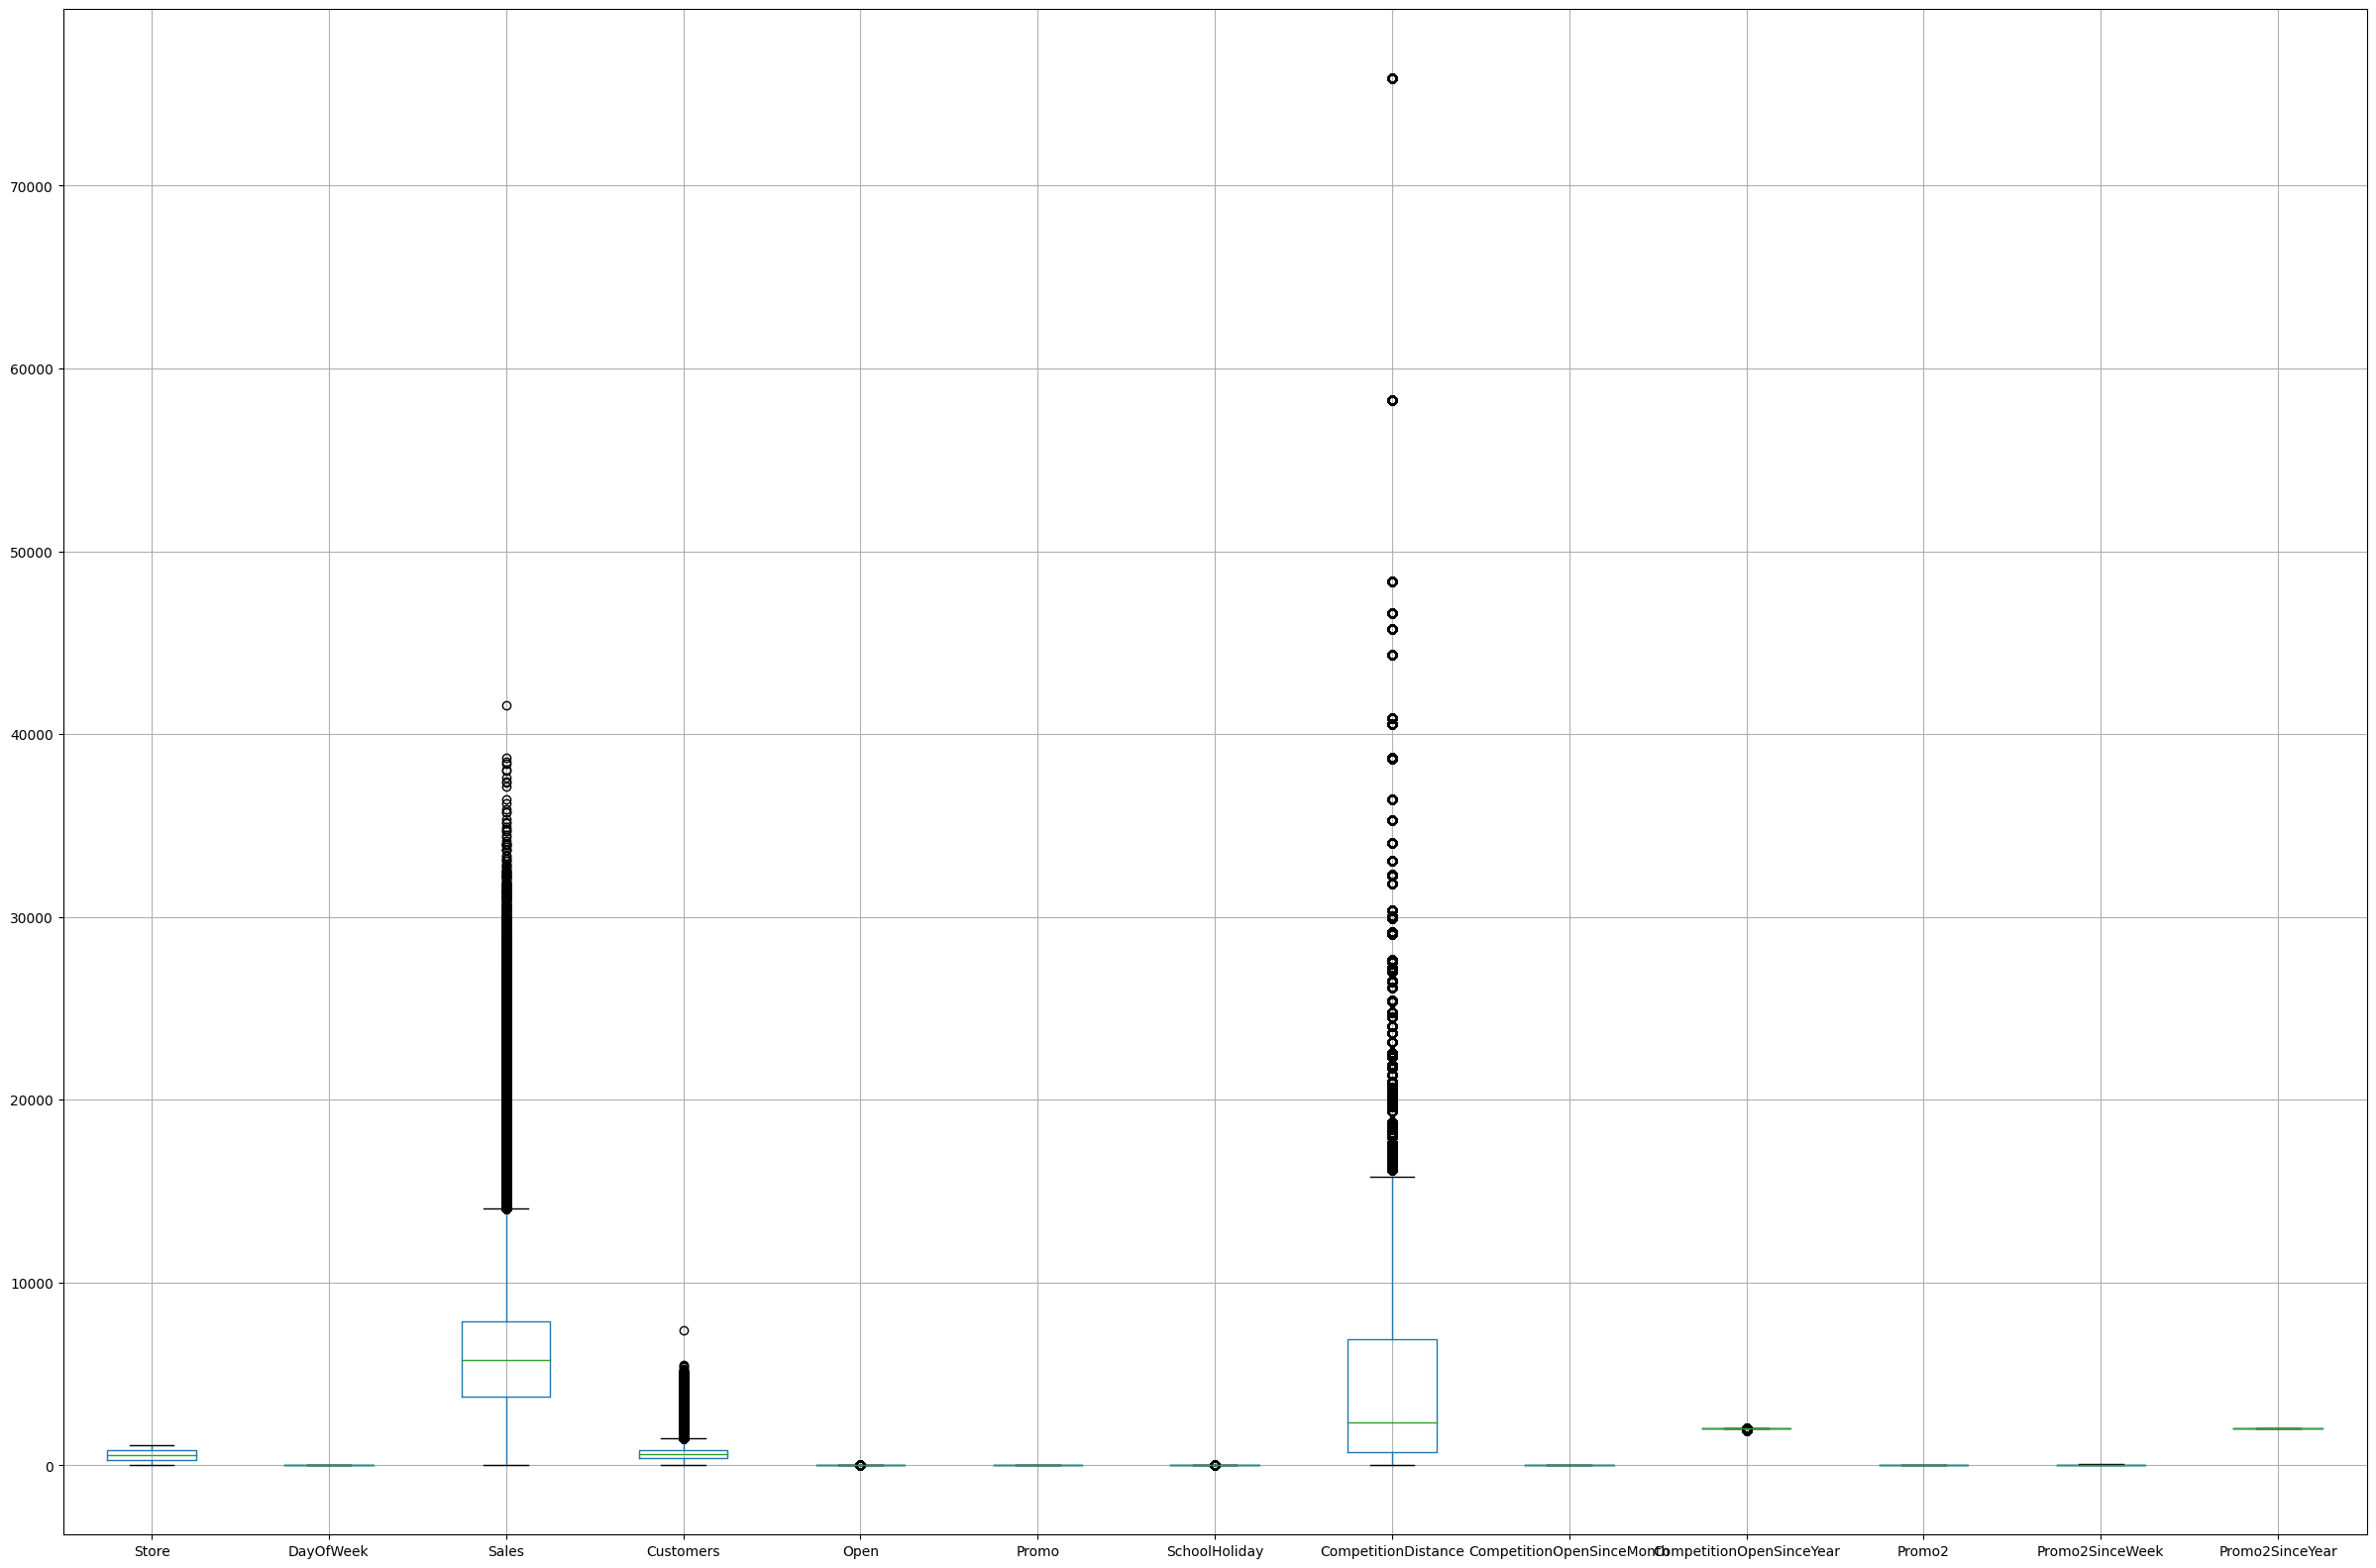

In [ ]:
merged_df[numerical].boxplot(figsize=(30,20))
plt.show()

> The boxplots reveal a great number of outliers in **`Sales`**, **`Customers`**, and **`CompetitionDistance`**

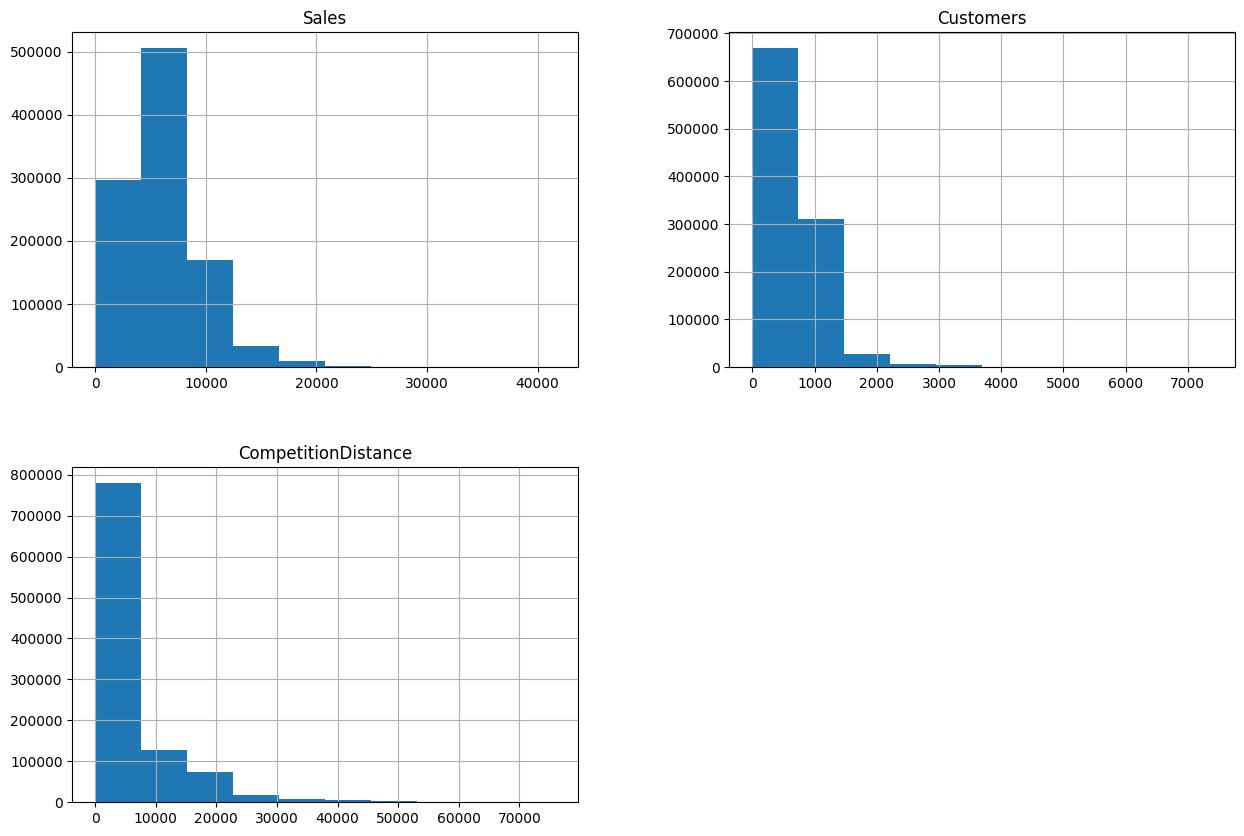

In [ ]:
outlier = ['Sales', 'Customers', 'CompetitionDistance']
merged_df[outlier].hist(bins=10, figsize=(15,10))
plt.show()

> We can see that the distribution of those suspected variable is **skewed** and need to be taken care of

Let's draw a heatmap to see the correlation between variables

<ipython-input-29-04f6751b6157>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = sns.heatmap(merged_df.corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.1g')


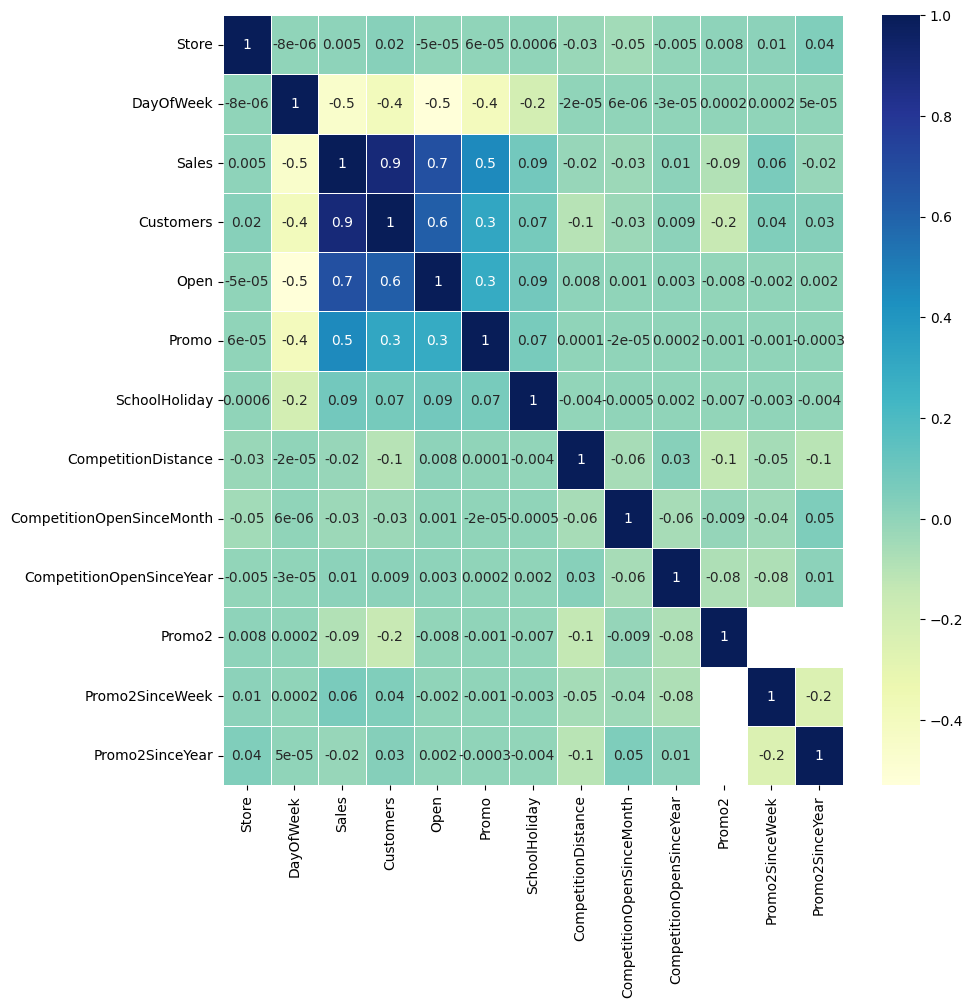

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cm = sns.heatmap(merged_df.corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.1g')

> From this heatmap, we can see blocks of **highly correlated** variables along the main diagonal.

## **II. Data Preparation**


### Date


Now, we will convert Date to Datetime column and extract different parts of the date.

In [ ]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
split_date(merged_df)

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


### Store Open/Closed

Next, notice that the sales are zero whenever the store is closed.



In [ ]:
merged_df[merged_df.Open == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

Since there are 172817 closed store, so instead of trying to model this relationship, it would be better to hard-code it, and remove the rows where the store is closed. 


In [ ]:
merged_df = merged_df[merged_df.Open == 1].copy()

### Competition

Next, we can use the columns `CompetitionOpenSince[Month/Year]` columns from `store_df` to compute the number of months for which a competitor has been open near the store.

In [ ]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [ ]:
comp_months(merged_df)


In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


Let's view the results of the new columns we've created.

In [ ]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].head()


,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
0,2015-07-31,1270.0,2008.0,9.0,82.0
1,2015-07-31,570.0,2007.0,11.0,92.0
2,2015-07-31,14130.0,2006.0,12.0,103.0
3,2015-07-31,620.0,2009.0,9.0,70.0
4,2015-07-31,29910.0,2015.0,4.0,3.0


### Additional Promotion

We can also add some additional columns to indicate how long a store has been running `Promo2` and whether a new round of `Promo2` starts in the current month.

In [ ]:
merged_df['Promo2Open'] = 12 * (merged_df.Year - merged_df.Promo2SinceYear) +  (merged_df.WeekOfYear - merged_df.Promo2SinceWeek)*7/30.5
merged_df['Promo2Open'] = merged_df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * merged_df['Promo2']
    

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,0,NaN,NaN,NaN,2013,1,1,1,76.0,0.000000
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,0,NaN,NaN,NaN,2013,1,1,1,159.0,0.000000
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0,1.213115
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,0,NaN,NaN,NaN,2013,1,1,1,0.0,0.000000


Now we will check if the promotion is applied in that specific month 

In [ ]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        #given input row the promointerval column is indexed and split by "," 
        months = (row['PromoInterval'] or '').split(',')
        #if the row indexed promo2open column and the row month are in months you return 1
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [ ]:
promo_cols(merged_df)

Let's view the results of the columns we've created.

In [ ]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(30)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
103597,2015-04-30,0,NaN,NaN,NaN,0.000000,0
498958,2014-04-10,1,2013.0,1.0,"Jan,Apr,Jul,Oct",15.213115,1
114364,2015-04-20,0,NaN,NaN,NaN,0.000000,0
187339,2015-02-13,1,2014.0,40.0,"Jan,Apr,Jul,Oct",4.426230,0
840841,2013-06-08,0,NaN,NaN,NaN,0.000000,0
108679,2015-04-25,0,NaN,NaN,NaN,0.000000,0
315740,2014-10-08,0,NaN,NaN,NaN,0.000000,0
880049,2013-05-04,1,2011.0,14.0,"Jan,Apr,Jul,Oct",24.918033,0
494299,2014-04-14,0,NaN,NaN,NaN,0.000000,0
50905,2015-06-16,1,2014.0,10.0,"Jan,Apr,Jul,Oct",15.442623,0


After this, the features related to competition and promotion are now much more useful.

### Input and Target Columns

Let's select the columns that we'll use for training.

In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

Now, we will identify our target and input data

In [ ]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [ ]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()


Let's also identify numeric and categorical columns. Note that we can treat binary categorical columns (0/1) as numeric columns.

In [ ]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

### Impute missing numerical data

In [ ]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

Seems like competition distance is the only missing value, and we can simply fill it with the highest value (to indicate that competition is very far away).

In [ ]:
max_distance = inputs.CompetitionDistance.max()

In [ ]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

### Scale Numeric Values

Let's scale numeric values to the 0 to 1 range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

### Encode Categorical Columns

Now we will one-hot encode the categorical columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [ ]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

Finally, let's extract out all the numeric data for training.

In [ ]:
X = inputs[numeric_cols + encoded_cols]

## **III. Train Models**
In this part, we will train our model using different ML algorithms. 

Since this is a **regression task**, we will use 2 algorthms in this project, namely:


1.   **Linear Regression**
2.   **XGBoost Classifier**




First, we will ***split*** our dataset into **train set** (60%), **validation set** (20%) and **test set**(20%).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.2, shuffle = True, random_state = 36)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle = True, random_state = 36) # 0.25*80 = 20

### ***1. Linear Regression***
Linear regression is a statistical technique used to establish a relationship between two continuous variables, where one variable is considered as the dependent variable and the other as the independent variable.  The goal is to estimate the values of the intercept and slope that minimize the distance between the predicted and actual values of the dependent variable in the dataset.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [ ]:
rmse(preds, y_test)

2721.383227537432

### ***2. XGBoost***
In this part, we will initialize an XGBRegressor and train the model. This using eXtreme Gradient Boosting - using gradient boosting algorithms for modern data science problems. It falls under the category of **Ensemble Learning** in ML, where we train and predict using many models to produce one superior output.
XGBoost is a popular and efficient open-source implementation of the **gradient boosted trees** algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

## Gradient Boosting

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model. 


### Training

To train a GBM, we can use the `XGBRegressor` class from the [`XGBoost`](https://xgboost.readthedocs.io/en/latest/) library.

In [ ]:
from xgboost import XGBRegressor
  

In [ ]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [ ]:
%%time
model.fit(X_train, y_train)

CPU times: user 21.6 s, sys: 124 ms, total: 21.7 s
Wall time: 12.5 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=-1, num_parallel_tree=None, predictor=None,
             random_state=42, ...)

### Prediction

We can now make predictions and evaluate the model using `model.predict`.

In [ ]:
preds = model.predict(X_test)
preds

array([ 8089.2993,  8115.0874, 10159.812 , ...,  6809.7515,  5555.018 ,
        7676.7476], dtype=float32)

### Evaluation

Let's evaluate the predictions using RMSE error.

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [ ]:
rmse(preds, y_test)

2374.4861956642885

And going back, if you just think about the average sales.
Most of sales are around 5000 to 10000 so rsme-2377 is not too bad

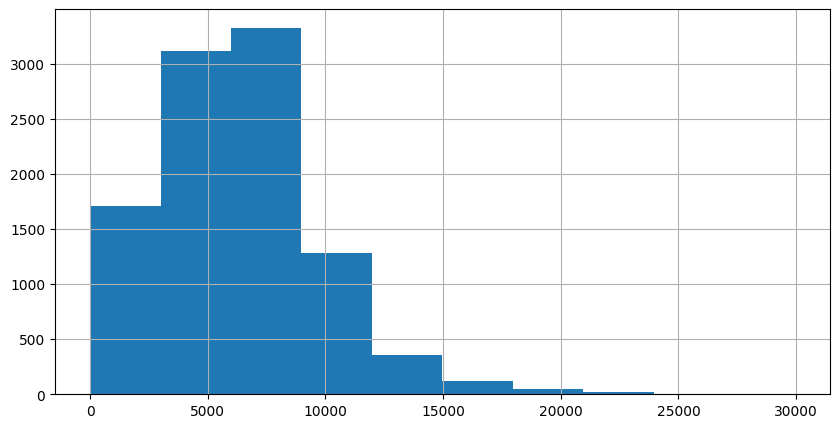

In [ ]:
%matplotlib inline
merged_df.Sales.sample(10000).hist(figsize=(10,5));

### Visualization

We can visualize individual trees using `plot_tree` (note: this requires the `graphviz` library to be installed).

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

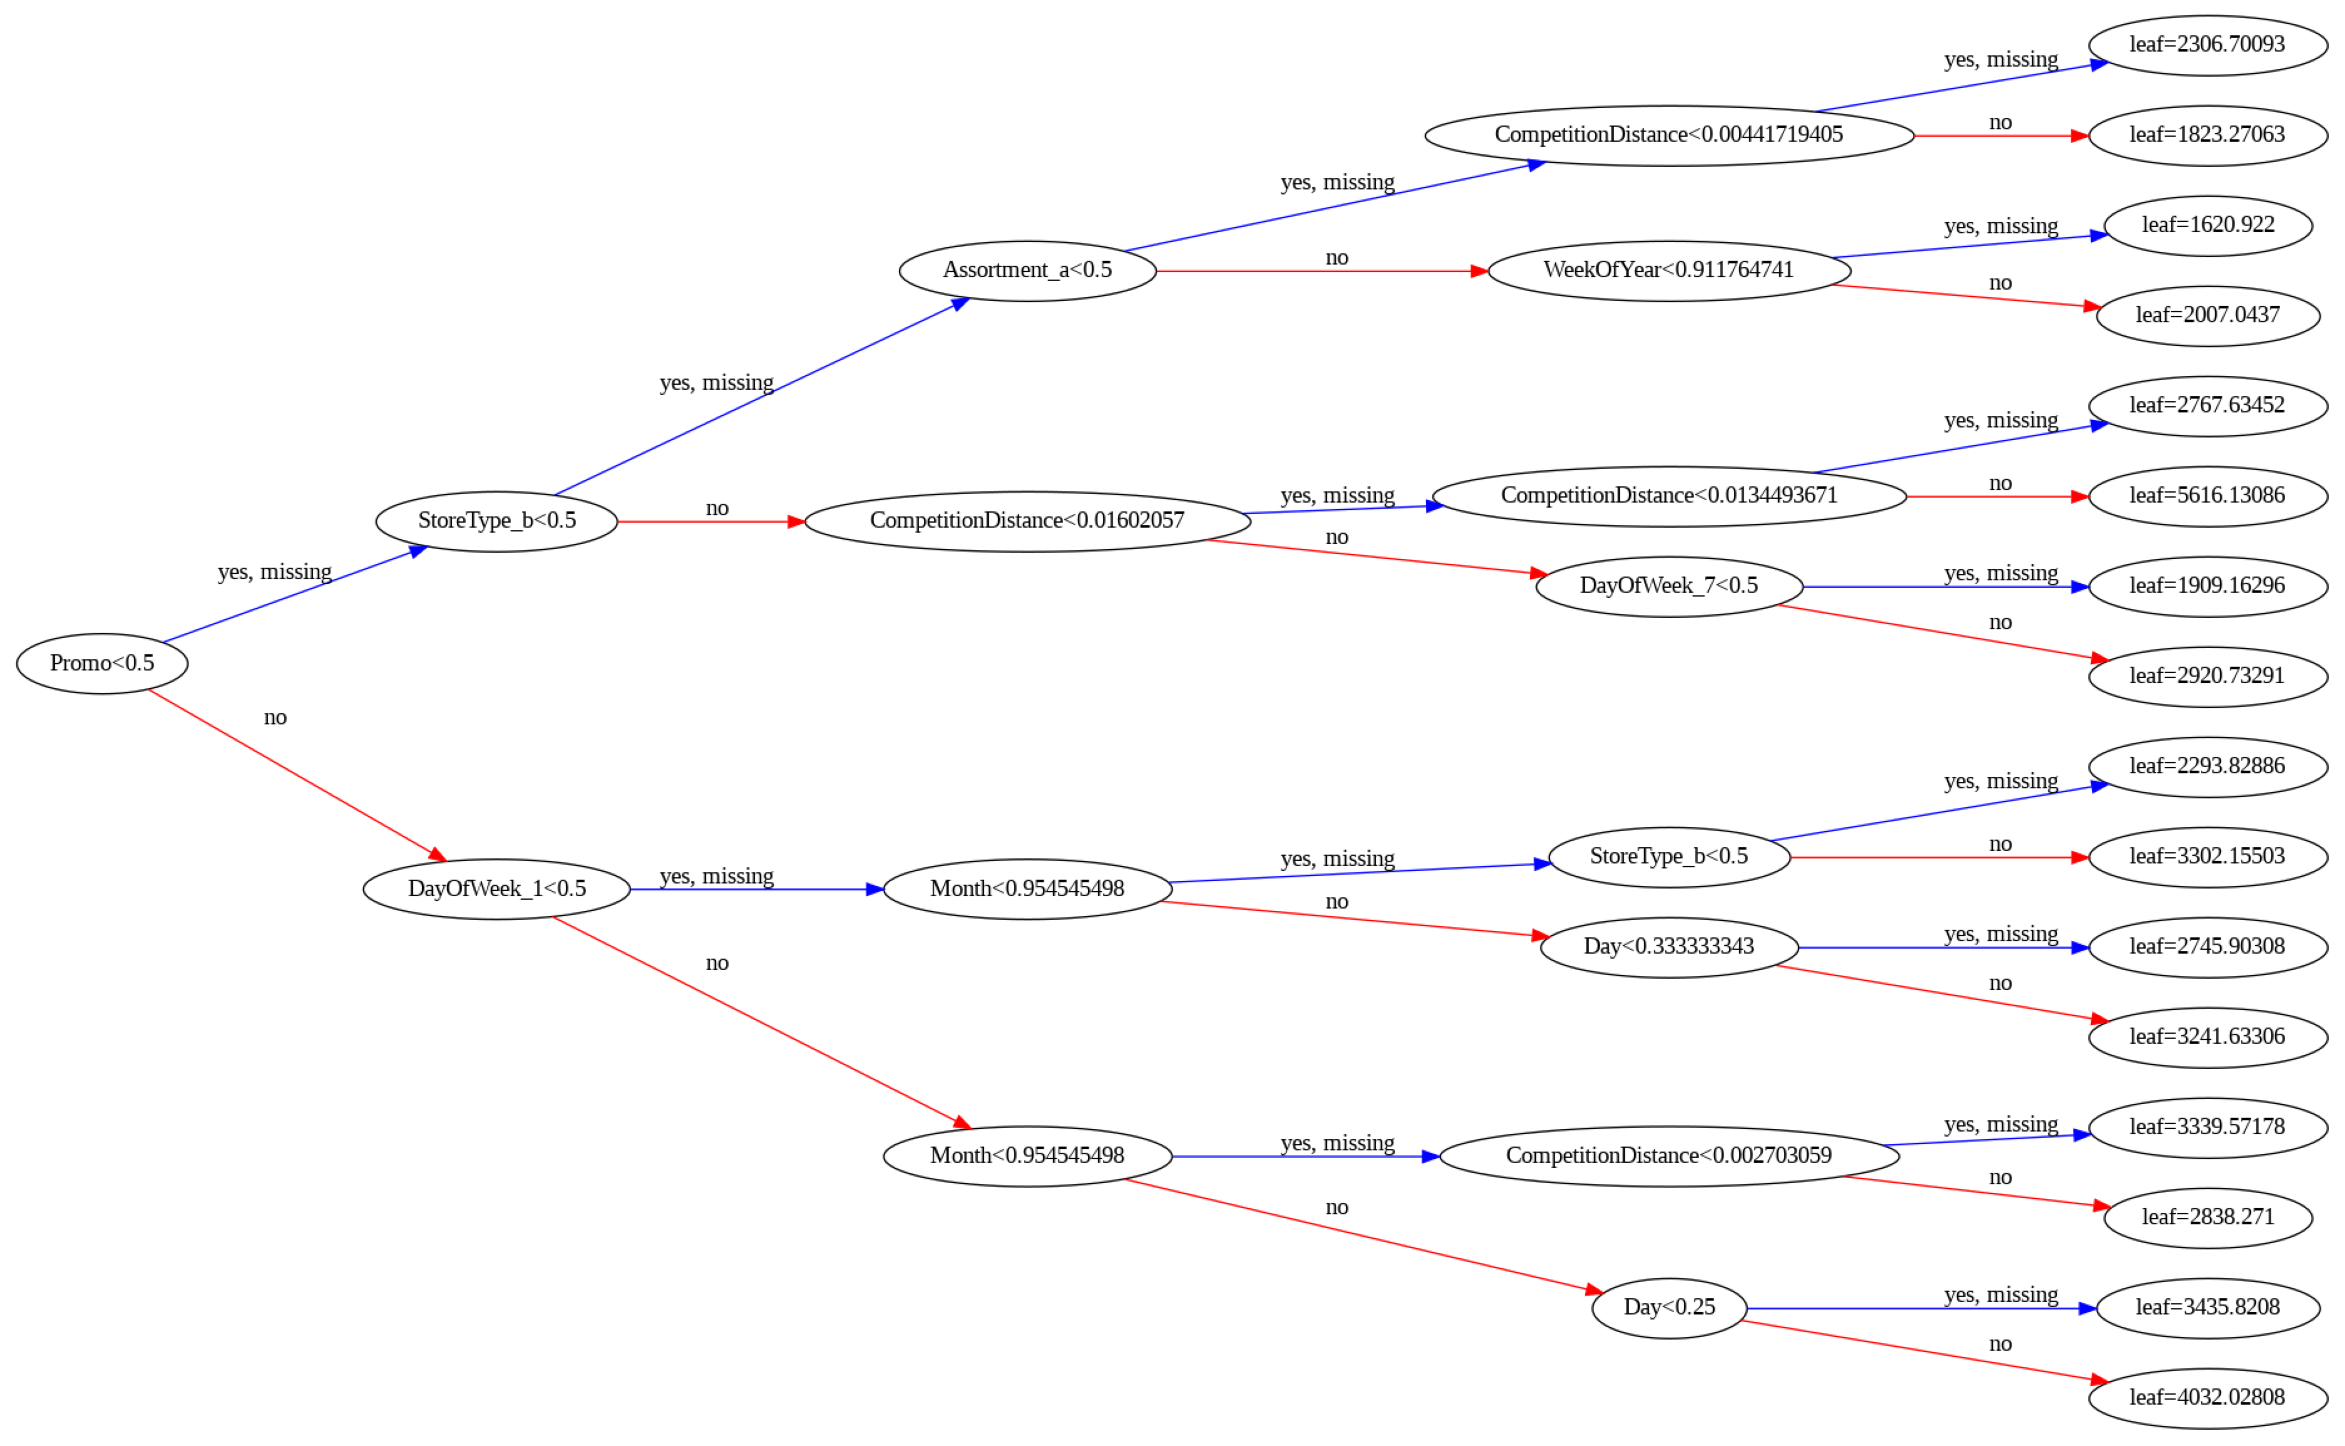

In [ ]:
plot_tree(model, rankdir='LR');

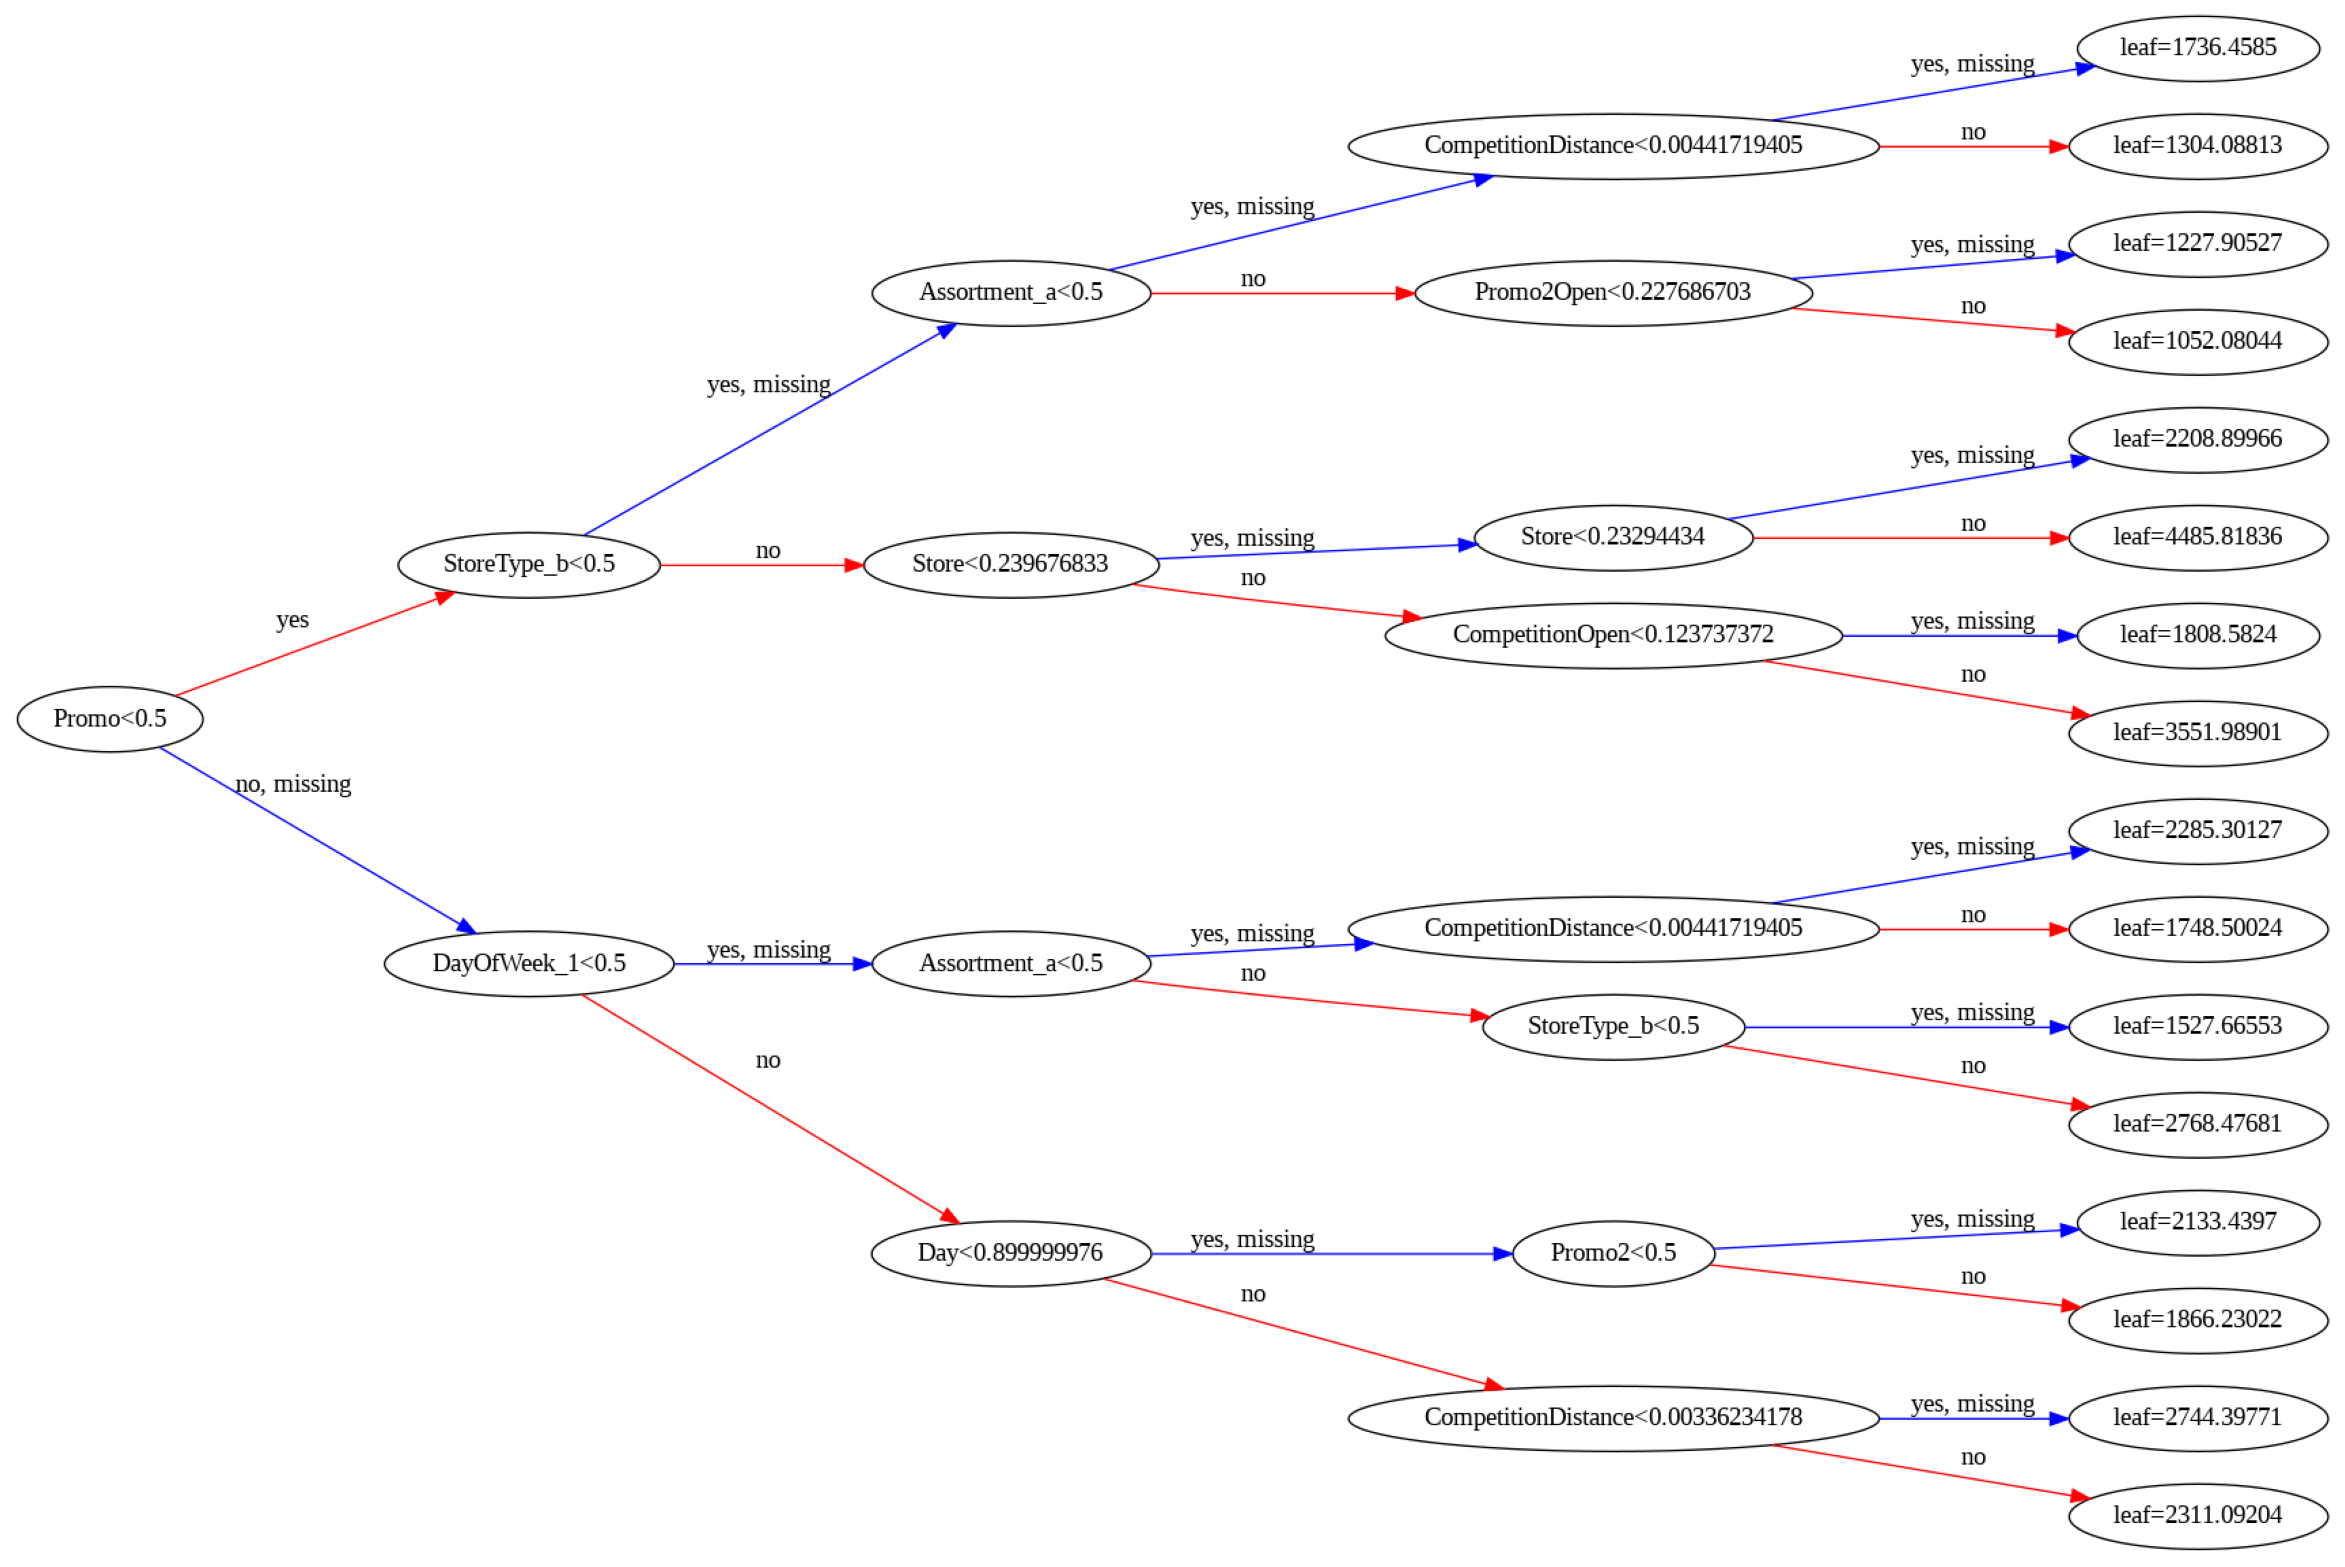

In [ ]:
plot_tree(model, rankdir='LR', num_trees=1);

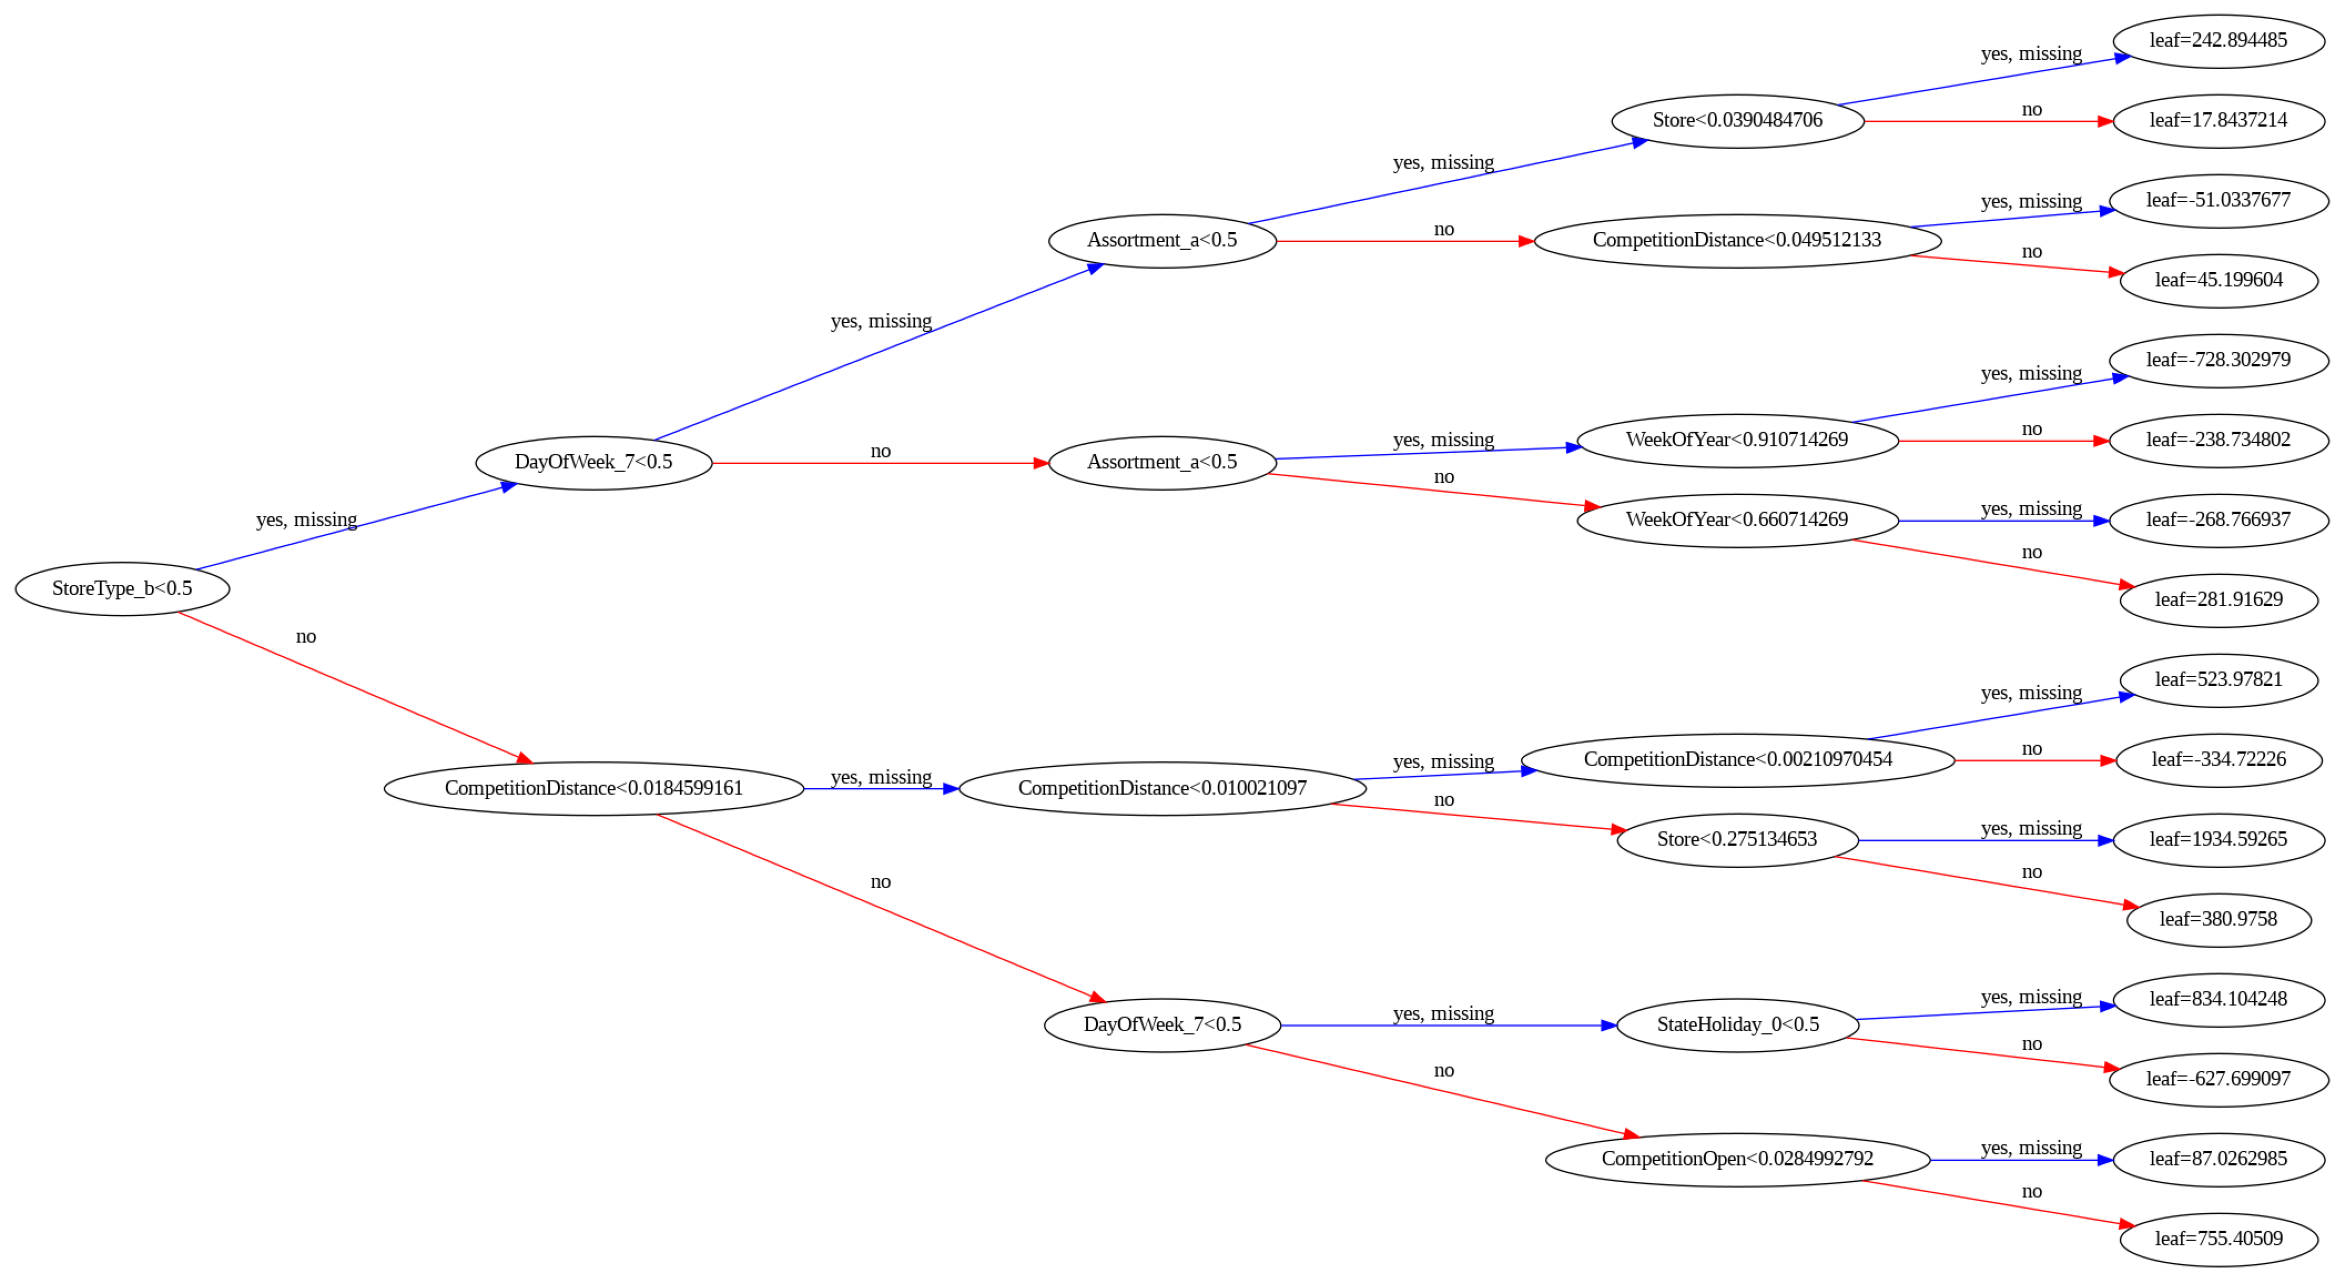

In [ ]:
plot_tree(model, rankdir='LR', num_trees=19);

Notice how the trees only compute residuals, and not the actual target value.

### Feature importance

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [ ]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
1,Promo,0.313629
12,DayOfWeek_1,0.097145
24,StoreType_b,0.095105
5,Promo2,0.068177
27,Assortment_a,0.056054
2,SchoolHoliday,0.038315
3,CompetitionDistance,0.037865
0,Store,0.034598
9,Month,0.032642
11,WeekOfYear,0.030688


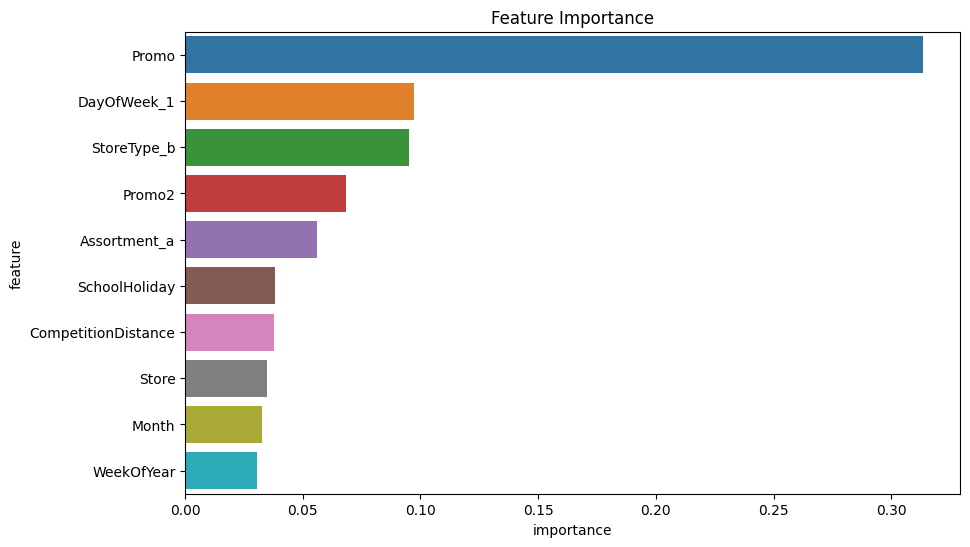

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning and Regularization

Just like other machine learning models, there are several hyperparameters we can to adjust the capacity of model and reduce overfitting. In this part, we will use the valid set that we have split before.
The below is the model we have used to predict.


In [ ]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=-1, num_parallel_tree=None, predictor=None,
             random_state=42, ...)

To perform hyperparameter tuning, we will pick a random 10% sample of the datasets as the validation set.

In [ ]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=36, **params)
    model.fit(X_train, y_train)
    train_rmse = rmse(model.predict(X_train), y_train)
    val_rmse = rmse(model.predict(X_val), y_val)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

First of all, we will test out value of one of the most important hyperparameters for XGBoost model - **n_estimators** - which stands for number of trees will be used. More trees means greater capacity of the model

In [ ]:
test_params(n_estimators=10)

Train RMSE: 2360.483810682337, Validation RMSE: 2371.8675307408907


In [ ]:
test_params(n_estimators=30)

Train RMSE: 1919.9987841428936, Validation RMSE: 1933.9978299384923


In [ ]:
test_params(n_estimators = 50)

Train RMSE: 1638.2198986781261, Validation RMSE: 1655.9341223318006


In [ ]:
test_params(n_estimators = 100)

Train RMSE: 1193.7774797413053, Validation RMSE: 1216.517814550746


In [ ]:
test_params(n_estimators = 200)

Train RMSE: 935.9485926110007, Validation RMSE: 966.4251858479382


In [ ]:
test_params(n_estimators = 400)

Train RMSE: 787.1510836917706, Validation RMSE: 832.7686195546164


As you can see, the model doesn't increase much accuracy after n_estimators compared to the resources taken. Therefore, we will use n_estimators = 200.

Next we will test out value of **max_depth** - which stands for the max depth of each tree. As we increase the max depth of each tree, the capacity of the tree will also increases and it can capture even more information about the training set. 

In [ ]:
test_params(n_estimators = 200, max_depth = 2)

Train RMSE: 2183.4016006954776, Validation RMSE: 2189.72122011013


In [ ]:
test_params(n_estimators =200, max_depth=5)

Train RMSE: 1104.1656416669894, Validation RMSE: 1125.0362462244336


In [ ]:
test_params(n_estimators =200, max_depth = 7)

Train RMSE: 813.831823294587, Validation RMSE: 866.922923301132


In [ ]:
test_params(n_estimators = 200, max_depth = 10)

Train RMSE: 537.9448795908235, Validation RMSE: 734.5740114569842


We will continue to

Last but not least, we will test out with the **learning rate** of the model - the scaling factor to be applied on each tree. A very high learning rate (close to 1) can lead to overfitting, while a low learning rate (close to 0) can lead to underfitting.

In this case, we will test n_estimators = 50 to save time and resources to find out which is the best learning rate.

In [ ]:
test_params(n_estimators= 100 ,learning_rate=0.01)

Train RMSE: 3654.578078452116, Validation RMSE: 3663.1349779699813


In [ ]:
test_params(n_estimators=100, learning_rate=0.1)

Train RMSE: 1858.944958642086, Validation RMSE: 1870.7704317587304


In [ ]:
test_params(n_estimators=100, learning_rate=0.3)

Train RMSE: 1193.7774797413053, Validation RMSE: 1216.517814550746


In [ ]:
test_params(n_estimators=100, learning_rate=0.7)

Train RMSE: 1293.7774797413053, Validation RMSE: 1416.517814550746


We can see that the best learning rate is 0.3. 
Now we will start with the final model.

## Putting it Together and Making Predictions

Let's train a final model on the entire training set with custom hyperparameters. 

In [ ]:
model = XGBRegressor(n_jobs=-1, random_state=36, n_estimators=200, 
                     learning_rate=0.3, max_depth=10)

In [ ]:
%%time
model.fit(X_train, y_train)

CPU times: user 9min 48s, sys: 1.19 s, total: 9min 50s
Wall time: 5min 37s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=36, ...)

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
rmse(test_preds,y_test)

746.0884953286718

## **IV. Conclusion**
In this project, we have used 2 different ML algorithms to predict the sales. The performance is as followed:
* **Linear Regression**: RMSE approx. ***2721***
* **XGBoost Classifier**: RMSE approx. ***2374*** (before hyperparameter tuning)
* **XGBoost Classifier**: RMSE approx. ***746*** (after hyperparameter tuning)


Overall, we can see that the model performance increase tremendously after using hyperparameter tuning and we have reached a great results in predicting the sales.

# ***Thanks for your attention***
